In [58]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Import everything that's used to linear regression

In [59]:
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2025-01-01')
print(data.head())
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
print("Simplified Columns:", data.columns)

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716087  72.776613  71.466827  71.721034  135480400
2020-01-03  72.009117  72.771745  71.783962  71.941328  146322800
2020-01-06  72.582916  72.621654  70.876083  71.127873  118387200
2020-01-07  72.241539  72.849216  72.021223  72.592586  108872000
2020-01-08  73.403648  73.706279  71.943759  71.943759  132079200
Simplified Columns: Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL'], dtype='object')


Fetching Stock Data
Specifically AAPL - Apple stocks
Using yahoo finance, you download the data that's provided

In [60]:
data['Returns_AAPL'] = data['Close_AAPL'].pct_change()
data.dropna(inplace=True)

This adds a new column called returns which is the daily returns as a feature. We use pct_change() because it computes the percentage change from the row to the one behind it. 

We also use dropna because some values might have NaN values.

In [61]:
X= data[['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']]
y = data['Close_AAPL']

X is the independent variables
y is the dependet variable

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.27
R^2 Score: 1.00


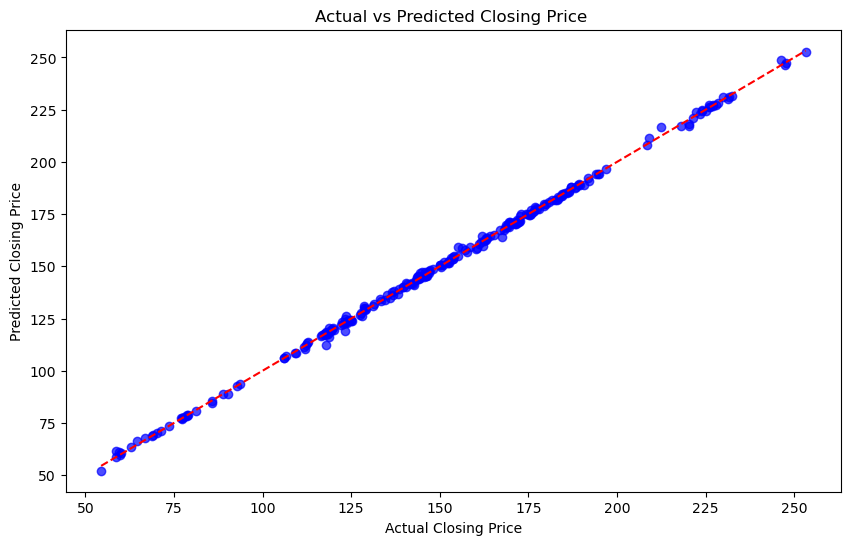

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',linestyle='--')

plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Price ')
plt.show()

In [66]:
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print(coefficients)

              Coefficient
Open_AAPL   -6.553574e-01
High_AAPL    8.491491e-01
Low_AAPL     8.051413e-01
Volume_AAPL -1.479623e-09


Conclusion:
This model clearly represents/perfectly predicts the closing prices. This is because the points are on the dotted red line which means the predicted = actual. 

This helped me learn the evaluation of regression models. The MSE of 1.27 represents low minimal errors and the high R^2 Score of 1.00 shows that there are accurate predictions and that the points are clustered closely around the diagonal line.